<a href="https://colab.research.google.com/github/YKulki/supersonic_flow_reconstruction/blob/main/MixedLength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files  #to upload a local file into stream
uploaded = files.upload()

Saving case10.csv to case10.csv
Saving case11.csv to case11.csv


In [ ]:
import io                       #to read uploaded input file according to specification
import numpy as np
import pandas as pd


df = pd.read_csv('case5.csv')



In [ ]:
shape=df.shape
rows=shape[0]
rows

22652

In [ ]:
x=df.iloc[:,0].values
y=df.iloc[:,1].values
v=df.iloc[:,2].values

x=x*1000
x=np.int_(x)



np.shape(x)

(22652,)

In [ ]:
X=61
B=np.zeros([121,2],float)
Vmax=np.zeros(121,float)
line=0

for i in range(rows-1):
  if x[i]==X:
    if x[i+1]==x[i]:
      B[line,0]=B[line,0]+(abs(y[i+1]-y[i])*(v[i]+v[i+1])/2)
      if v[i]>B[line,1]:
        B[line,1]=v[i]
  else:
    line=line+1
    X=X+1

B[:,0]=B[:,0]/0.12
y = B[~np.isnan(B[:])]
y = B[~np.all(B==0.0)]
line

119

In [ ]:

ml=0 

beta=np.zeros(121,float)
for i in range(line):
  if B[i,0]>1e-4:
    beta[i]=float(B[i,0]/B[i,1])
    if abs(beta[i]-0.58)<0.1:
      ml=i
  else:
    beta[i]=0.0

for i in range(40,line):
   if abs(beta[i]-np.max(beta)*0.95)<0.1:
      ml=i
      break

In [ ]:
ml


63

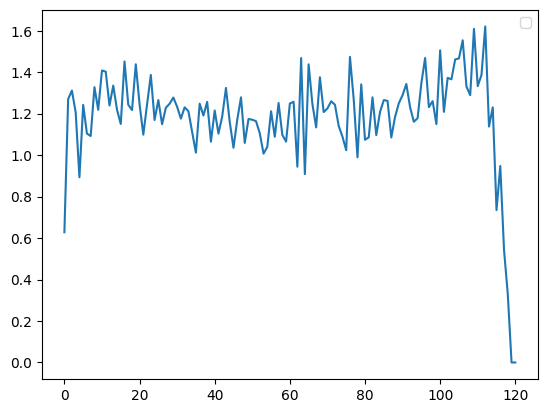

In [ ]:
import matplotlib.pyplot as plt

plt.plot(beta)

plt.legend()